In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('C:\\Users\\VIPIN\\Desktop\\FormulaOne\\Report 2\\CSVDatasetModified.csv')
data

,UniqueID,RaceID,RaceName,DriverID,DriverName,DriverFullName,Constructor,QualifyID,StatusID,Status,...,PositionOrder,Points,FastestLapTimeSeconds,FastestLapSpeed,TotalPitstops,AvgPitDuration,FastestPitstop,Qualyfing1Seconds,Qualyfing2Seconds,Qualyfing3Seconds
0,1031_1,1031,Austrian Grand Prix,1,hamilton,Lewis Hamilton,Mercedes,8379,1,Finished,...,4,12,67.7,229.572,2,19.107500,16.365,64.2,63.1,63.0
1,1031_20,1031,Austrian Grand Prix,20,vettel,Sebastian Vettel,Ferrari,8388,1,Finished,...,10,1,68.6,226.524,3,21.433000,19.330,64.6,64.2,0.0
2,1031_815,1031,Austrian Grand Prix,815,perez,Sergio Pérez,Racing Point,8383,1,Finished,...,6,8,68.3,227.579,2,19.464500,16.546,64.5,63.9,63.9
3,1031_822,1031,Austrian Grand Prix,822,bottas,Valtteri Bottas,Mercedes,8378,1,Finished,...,1,25,67.7,229.758,2,19.172000,16.407,64.1,63.0,62.9
4,1031_832,1031,Austrian Grand Prix,832,sainz,Carlos Sainz,McLaren,8385,1,Finished,...,5,10,68.0,228.687,3,21.898667,20.064,64.5,64.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,1120_847,1120,Abu Dhabi Grand Prix,847,russell,George Russell,Mercedes,10056,1,Finished,...,3,15,88.2,215.582,2,21.867000,21.650,84.3,84.0,83.8
765,1120_848,1120,Abu Dhabi Grand Prix,848,albon,Alexander Albon,Williams,10066,1,Finished,...,14,0,87.8,216.422,2,22.044500,21.919,84.3,84.4,0.0
766,1120_852,1120,Abu Dhabi Grand Prix,852,tsunoda,Yuki Tsunoda,AlphaTauri,10058,1,Finished,...,8,4,89.3,213.000,1,21.486000,21.486,84.3,84.2,84.0
767,1120_855,1120,Abu Dhabi Grand Prix,855,zhou,Zhou Guanyu,Alfa Romeo,10071,1,Finished,...,17,0,88.7,214.224,2,22.606000,22.345,85.2,0.0,0.0


Cluster Summary:
    Cluster Number  Total Members IQR AvgLapTimeSeconds (25%-75%)  \
0                0             29                    (70.6, 71.8)   
1                1             39                   (81.5, 83.45)   
2                2             40                 (84.275, 86.95)   
3                3             91                  (91.55, 94.85)   
4                4             40                (100.1, 103.025)   
5                5             24              (109.875, 111.025)   
6                6             67                 (110.25, 116.5)   
7                7             50                 (100.6, 104.55)   
8                8             41                   (98.5, 102.0)   
9                9             22                  (84.6, 87.925)   
10              10             25                   (98.6, 101.8)   
11              11             44       (88.07499999999999, 92.8)   

   IQR FastestLapTimeSeconds (25%-75%)  \
0                         (67.3, 68.8)   
1

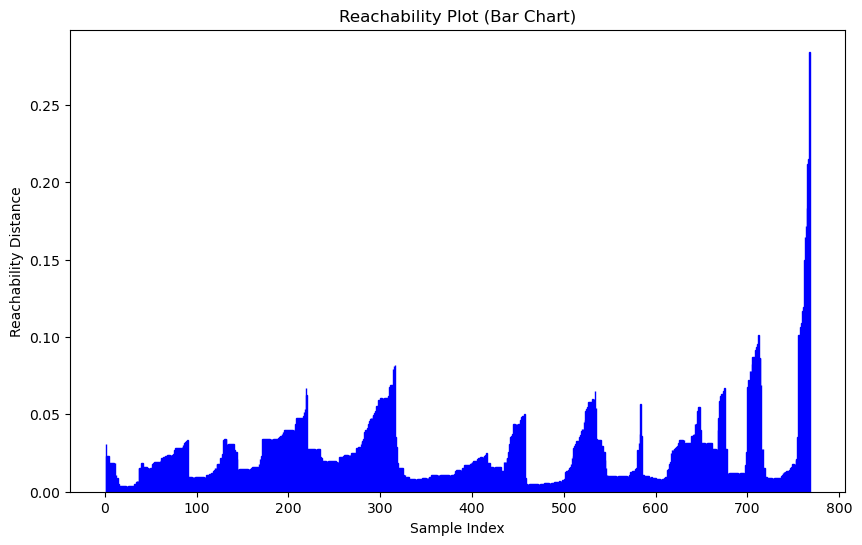

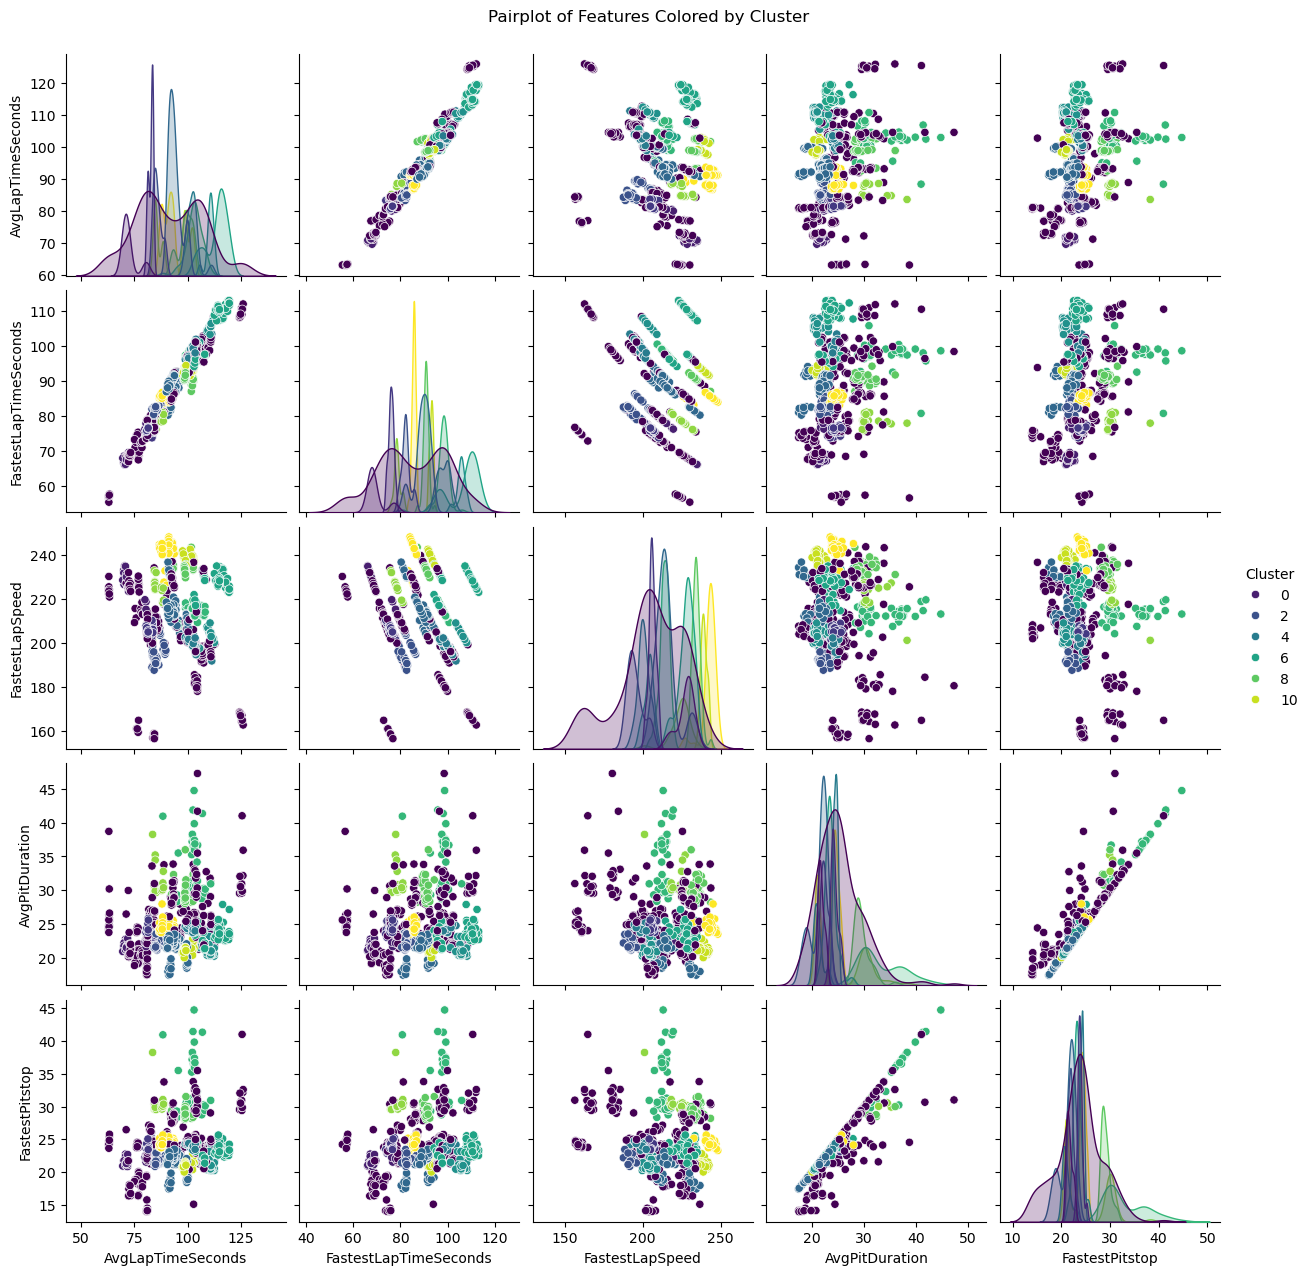

In [3]:
# COSINE with Reachability Plot

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for clustering
columns = [
    "AvgLapTimeSeconds",
    "FastestLapTimeSeconds",
    "FastestLapSpeed",
    "AvgPitDuration",
    "FastestPitstop",
]

# Standardizing quantitative features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Perform OPTICS clustering
optics = OPTICS(metric="cosine", min_samples=20, xi=.02)
labels = optics.fit_predict(data_scaled)

# Add cluster labels to the dataframe
data["Cluster"] = labels

# Filter out noise points for silhouette and other metrics (-1 is noise in OPTICS)
valid_labels = labels[labels != -1]
valid_data_scaled = data_scaled[labels != -1]

# Calculate validity metrics for valid clusters
if len(set(valid_labels)) > 1:  # Metrics require at least 2 clusters
    silhouette_avg = silhouette_score(valid_data_scaled, valid_labels, metric="cosine")
    davies_bouldin = davies_bouldin_score(valid_data_scaled, valid_labels)
else:
    silhouette_avg = np.nan
    davies_bouldin = np.nan

# Calculate per-cluster silhouette scores
silhouette_vals = silhouette_samples(valid_data_scaled, valid_labels, metric="cosine")

# Create a summary table for clusters
cluster_info = []
numeric_columns = ["AvgLapTimeSeconds", "FastestLapTimeSeconds", "FastestLapSpeed", "AvgPitDuration", "FastestPitstop",]

unique_clusters = set(valid_labels)
for cluster_num in unique_clusters:
    cluster_data = data[data["Cluster"] == cluster_num]
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]

    # Metrics for the cluster
    total_members = len(cluster_data)
    variable_iqr = {
        f"IQR {col} (25%-75%)": (np.percentile(cluster_data[col], 25), np.percentile(cluster_data[col], 75))
        for col in numeric_columns
    }
    avg_silhouette = silhouette_vals[valid_labels == cluster_num].mean() if len(cluster_data) > 1 else np.nan
    avg_distance = np.mean(
        cdist(cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine")
    )

    cluster_info.append(
        {
            "Cluster Number": cluster_num,
            "Total Members": total_members,
            **variable_iqr,
            "Average Silhouette Score": avg_silhouette,
            "Average Distance from Core": avg_distance,
        }
    )

# Convert cluster summary to DataFrame
cluster_summary_df = pd.DataFrame(cluster_info)

# Compute the Average Within-Cluster Sum of Squares (WCSS)
wcss_list = []
for cluster_num in unique_clusters:
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]
    dist_to_core = cdist(
        cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine"
    )
    wcss = np.sum(dist_to_core**2)  # Square of the distances
    wcss_list.append(wcss)

average_wcss = np.mean(wcss_list) if wcss_list else np.nan

# Calculate the total number of clustered members (excluding noise)
total_clustered_members = len(valid_labels)

# Create a summary table for validity metrics
validity_metrics = {
    "Metric": ["Silhouette Index", "Davies-Bouldin Index", "Average WCSS", "Total Clustered Members"],
    "Value": [silhouette_avg, davies_bouldin, average_wcss, total_clustered_members],
}
validity_metrics_df = pd.DataFrame(validity_metrics)

# Compute pairwise distance matrix between each cluster's core points
cluster_cores = np.array([
    np.mean(valid_data_scaled[valid_labels == cluster_num], axis=0)
    for cluster_num in unique_clusters
])

medoid_dist_matrix = cdist(cluster_cores, cluster_cores, metric="cosine")
medoid_dist_matrix_df = pd.DataFrame(medoid_dist_matrix, columns=[f"Cluster {i}" for i in unique_clusters],
                                      index=[f"Cluster {i}" for i in unique_clusters])

# Output results to CSV files
cluster_summary_df.to_csv("OPcluster_summary_OPTICS.csv", index=False)
validity_metrics_df.to_csv("OPcluster_validity_metrics_OPTICS.csv", index=False)
medoid_dist_matrix_df.to_csv("OPmedoid_distance_matrix_OPTICS.csv")

# Print the validity metrics
print("Cluster Summary:")
print(cluster_summary_df)
print("\nValidity Metrics:")
print(validity_metrics_df)
print("\nMedoid Distance Matrix:")
print(medoid_dist_matrix_df)

# Plot the reachability plot as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(optics.reachability_)), optics.reachability_[optics.ordering_], color='skyblue', edgecolor='blue')
plt.xlabel("Sample Index")
plt.ylabel("Reachability Distance")
plt.title("Reachability Plot (Bar Chart)")
plt.show()

# Pairplot to show pairwise relationships between features
sns.pairplot(data, hue="Cluster", vars=numeric_columns, palette="viridis")
plt.suptitle("Pairplot of Features Colored by Cluster", y=1.02)

# Save the pairplot as a PNG file
plt.savefig("OPpairplot_clusters_OPTICS.png")
plt.show()

Cluster Summary:
   Cluster Number  Total Members IQR AvgLapTimeSeconds (25%-75%)  \
0               0            304                (78.275, 90.625)   
1               1            209                  (103.3, 114.2)   
2               2            129                   (90.4, 101.9)   

  IQR FastestLapTimeSeconds (25%-75%) IQR FastestLapSpeed (25%-75%)  \
0         (73.775, 84.82499999999999)        (204.80075, 219.93075)   
1                       (97.2, 108.3)            (197.722, 224.098)   
2                        (85.7, 92.1)             (218.28, 234.203)   

  IQR AvgPitDuration (25%-75%) IQR FastestPitstop (25%-75%)  \
0    (21.37475, 23.6952499975)            (21.0545, 23.244)   
1             (22.9495, 25.14)             (22.698, 24.436)   
2             (28.561, 31.534)             (28.353, 30.566)   

   Average Silhouette Score  Average Distance from Core  
0                  0.595545                    0.239486  
1                  0.706902                    0.167142 

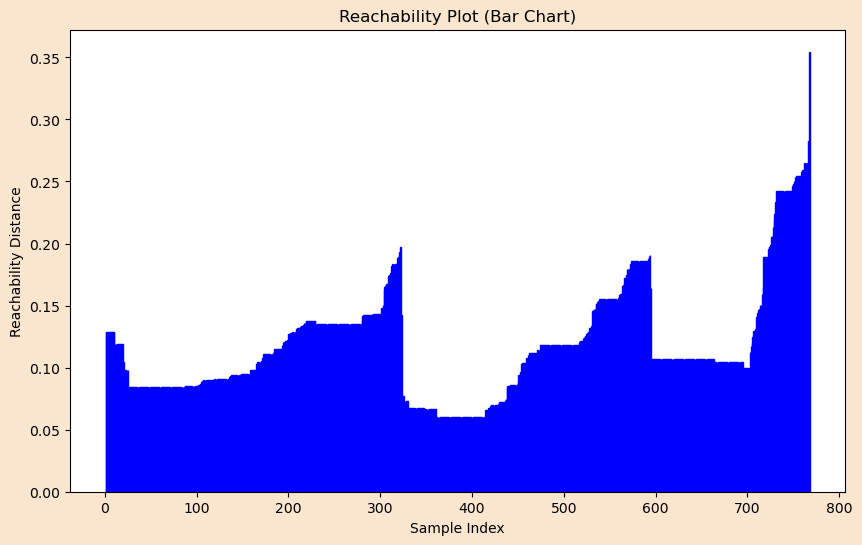

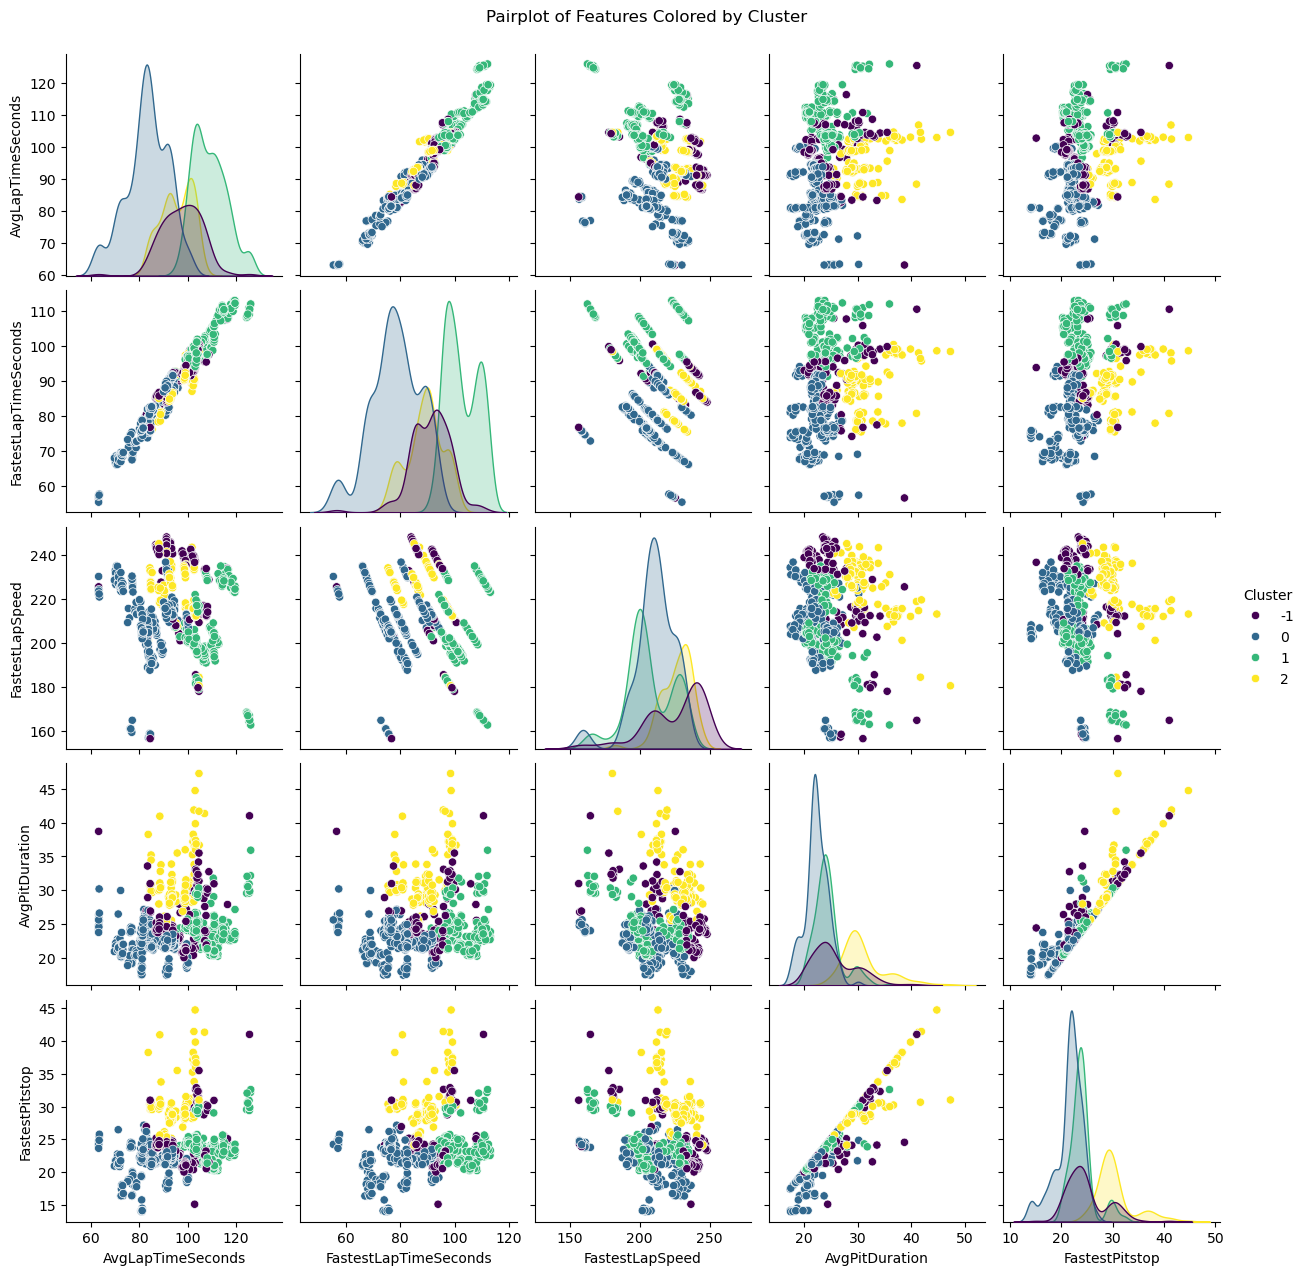

In [8]:
# COSINE with Reachability Plot 80, 0.06

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for clustering
columns = [
    "AvgLapTimeSeconds",
    "FastestLapTimeSeconds",
    "FastestLapSpeed",
    "AvgPitDuration",
    "FastestPitstop",
]

# Standardizing quantitative features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Perform OPTICS clustering
optics = OPTICS(metric="cosine", min_samples=80, xi=.06)
labels = optics.fit_predict(data_scaled)

# Add cluster labels to the dataframe
data["Cluster"] = labels

# Filter out noise points for silhouette and other metrics (-1 is noise in OPTICS)
valid_labels = labels[labels != -1]
valid_data_scaled = data_scaled[labels != -1]

# Calculate validity metrics for valid clusters
if len(set(valid_labels)) > 1:  # Metrics require at least 2 clusters
    silhouette_avg = silhouette_score(valid_data_scaled, valid_labels, metric="cosine")
    davies_bouldin = davies_bouldin_score(valid_data_scaled, valid_labels)
else:
    silhouette_avg = np.nan
    davies_bouldin = np.nan

# Calculate per-cluster silhouette scores
silhouette_vals = silhouette_samples(valid_data_scaled, valid_labels, metric="cosine")

# Create a summary table for clusters
cluster_info = []
numeric_columns = ["AvgLapTimeSeconds", "FastestLapTimeSeconds", "FastestLapSpeed", "AvgPitDuration", "FastestPitstop",]

unique_clusters = set(valid_labels)
for cluster_num in unique_clusters:
    cluster_data = data[data["Cluster"] == cluster_num]
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]

    # Metrics for the cluster
    total_members = len(cluster_data)
    variable_iqr = {
        f"IQR {col} (25%-75%)": (np.percentile(cluster_data[col], 25), np.percentile(cluster_data[col], 75))
        for col in numeric_columns
    }
    avg_silhouette = silhouette_vals[valid_labels == cluster_num].mean() if len(cluster_data) > 1 else np.nan
    avg_distance = np.mean(
        cdist(cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine")
    )

    cluster_info.append(
        {
            "Cluster Number": cluster_num,
            "Total Members": total_members,
            **variable_iqr,
            "Average Silhouette Score": avg_silhouette,
            "Average Distance from Core": avg_distance,
        }
    )

# Convert cluster summary to DataFrame
cluster_summary_df = pd.DataFrame(cluster_info)

# Compute the Average Within-Cluster Sum of Squares (WCSS)
wcss_list = []
for cluster_num in unique_clusters:
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]
    dist_to_core = cdist(
        cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine"
    )
    wcss = np.sum(dist_to_core**2)  # Square of the distances
    wcss_list.append(wcss)

average_wcss = np.mean(wcss_list) if wcss_list else np.nan

# Calculate the total number of clustered members (excluding noise)
total_clustered_members = len(valid_labels)

# Create a summary table for validity metrics
validity_metrics = {
    "Metric": ["Silhouette Index", "Davies-Bouldin Index", "Average WCSS", "Total Clustered Members"],
    "Value": [silhouette_avg, davies_bouldin, average_wcss, total_clustered_members],
}
validity_metrics_df = pd.DataFrame(validity_metrics)

# Compute pairwise distance matrix between each cluster's core points
cluster_cores = np.array([
    np.mean(valid_data_scaled[valid_labels == cluster_num], axis=0)
    for cluster_num in unique_clusters
])

medoid_dist_matrix = cdist(cluster_cores, cluster_cores, metric="cosine")
medoid_dist_matrix_df = pd.DataFrame(medoid_dist_matrix, columns=[f"Cluster {i}" for i in unique_clusters],
                                      index=[f"Cluster {i}" for i in unique_clusters])

# Output results to CSV files
cluster_summary_df.to_csv("80.06OPcluster_summary_OPTICS.csv", index=False)
validity_metrics_df.to_csv("80.06OPcluster_validity_metrics_OPTICS.csv", index=False)
medoid_dist_matrix_df.to_csv("80.06OPmedoid_distance_matrix_OPTICS.csv")

# Print the validity metrics
print("Cluster Summary:")
print(cluster_summary_df)
print("\nValidity Metrics:")
print(validity_metrics_df)
print("\nMedoid Distance Matrix:")
print(medoid_dist_matrix_df)

# Plot the reachability plot as a bar chart
plt.figure(figsize=(10, 6))
plt.gcf().patch.set_facecolor('#FAE6CF')  # Set background color
plt.bar(range(len(optics.reachability_)), optics.reachability_[optics.ordering_], color='skyblue', edgecolor='blue')
plt.xlabel("Sample Index")
plt.ylabel("Reachability Distance")
plt.title("Reachability Plot (Bar Chart)")
plt.savefig("80.06OPreachabilityplot_clusters_OPTICS.png")
plt.show()

# Pairplot to show pairwise relationships between features
sns.pairplot(data, hue="Cluster", vars=numeric_columns, palette="viridis")
plt.suptitle("Pairplot of Features Colored by Cluster", y=1.02)

# Save the pairplot as a PNG file
plt.savefig("80.06OPpairplot_clusters_OPTICS.png")
plt.show()

Cluster Summary:
   Cluster Number  Total Members IQR AvgLapTimeSeconds (25%-75%)  \
0               0            190                   (73.1, 83.95)   
1               1            247                 (102.9, 112.65)   
2               2            129                   (90.4, 101.9)   

  IQR FastestLapTimeSeconds (25%-75%)    IQR FastestLapSpeed (25%-75%)  \
0                      (69.375, 79.8)  (203.50325, 222.29250000000002)   
1                       (96.6, 108.0)   (198.14249999999998, 228.7055)   
2                        (85.7, 92.1)                (218.28, 234.203)   

               IQR AvgPitDuration (25%-75%)   IQR FastestPitstop (25%-75%)  \
0       (21.4892083325, 23.840333332500002)               (21.145, 23.469)   
1  (22.384999999999998, 25.146166665000003)  (22.252000000000002, 24.3955)   
2                          (28.561, 31.534)               (28.353, 30.566)   

   Average Silhouette Score  Average Distance from Core  
0                  0.808930               

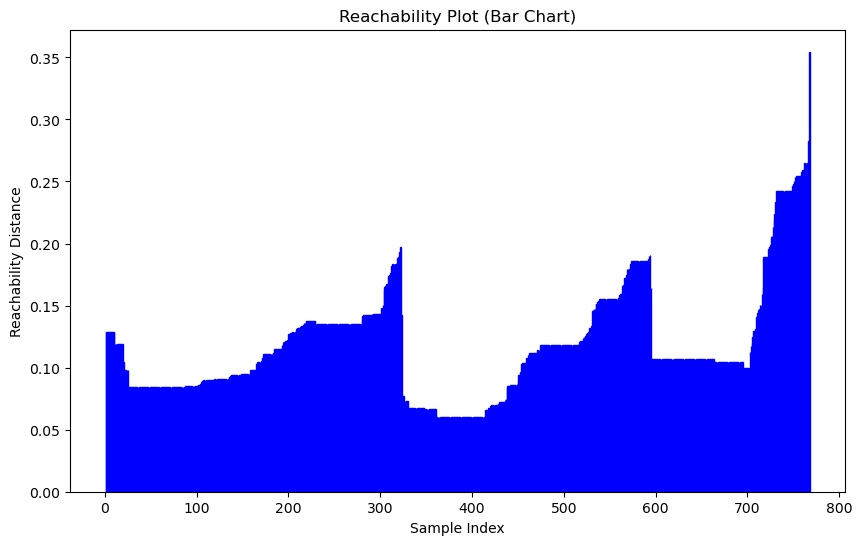

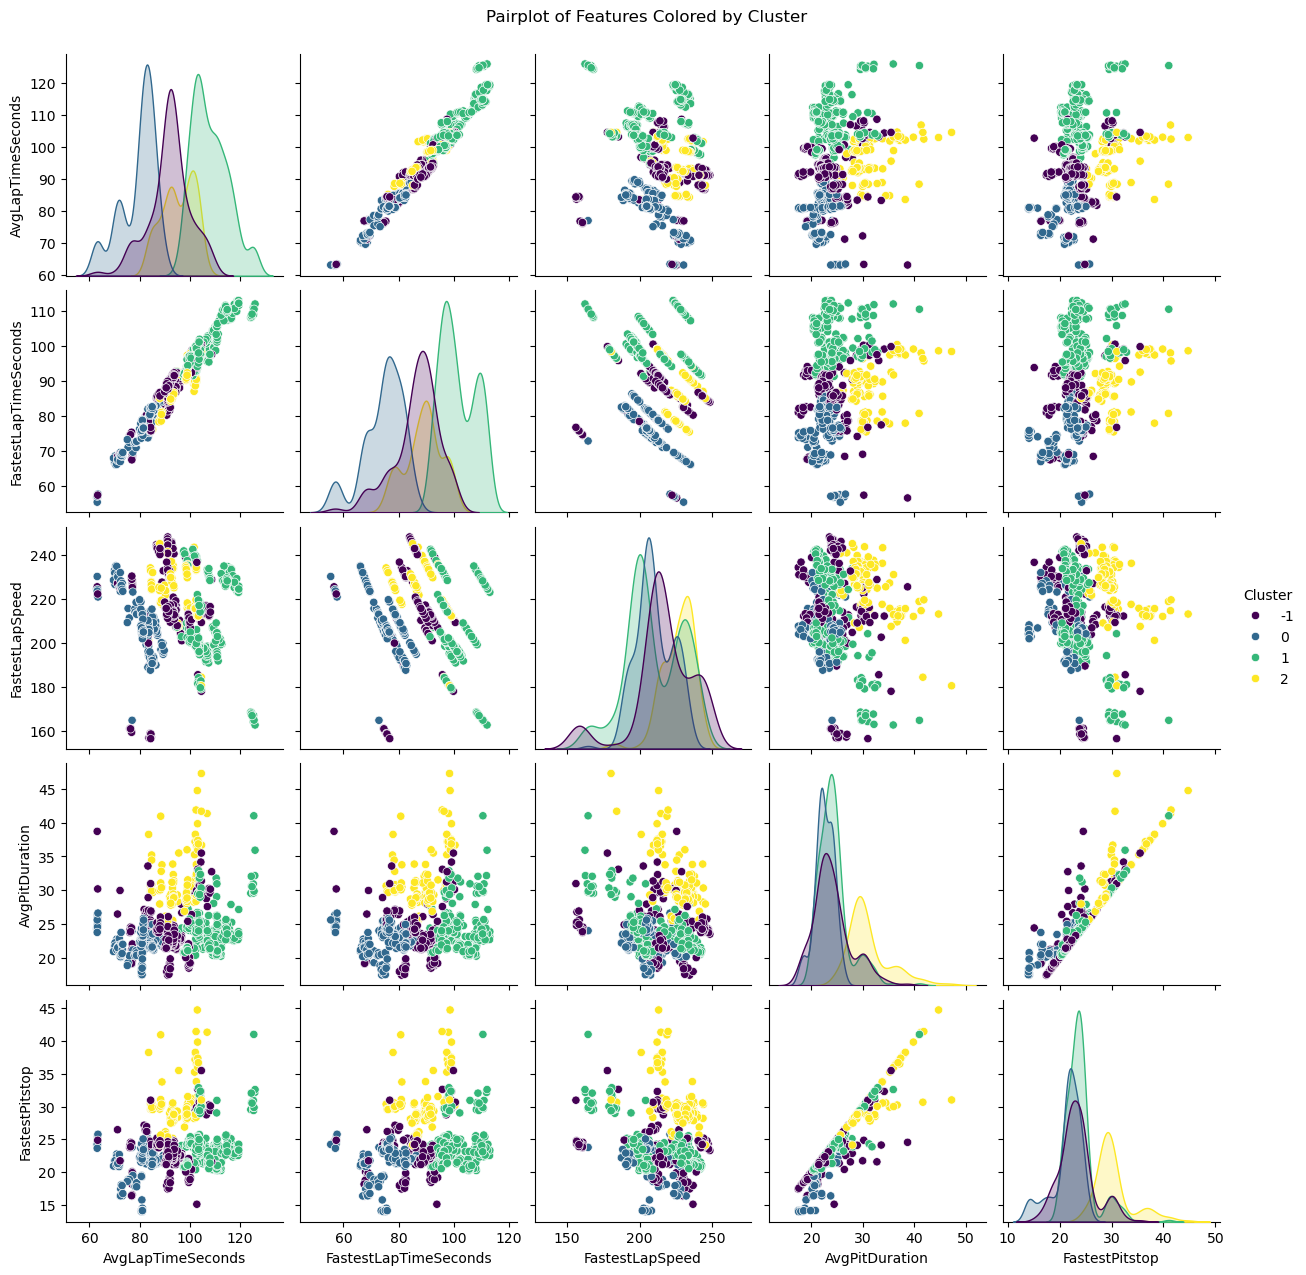

In [5]:
# COSINE with Reachability Plot 80, 0.02

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for clustering
columns = [
    "AvgLapTimeSeconds",
    "FastestLapTimeSeconds",
    "FastestLapSpeed",
    "AvgPitDuration",
    "FastestPitstop",
]

# Standardizing quantitative features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Perform OPTICS clustering
optics = OPTICS(metric="cosine", min_samples=80, xi=.02)
labels = optics.fit_predict(data_scaled)

# Add cluster labels to the dataframe
data["Cluster"] = labels

# Filter out noise points for silhouette and other metrics (-1 is noise in OPTICS)
valid_labels = labels[labels != -1]
valid_data_scaled = data_scaled[labels != -1]

# Calculate validity metrics for valid clusters
if len(set(valid_labels)) > 1:  # Metrics require at least 2 clusters
    silhouette_avg = silhouette_score(valid_data_scaled, valid_labels, metric="cosine")
    davies_bouldin = davies_bouldin_score(valid_data_scaled, valid_labels)
else:
    silhouette_avg = np.nan
    davies_bouldin = np.nan

# Calculate per-cluster silhouette scores
silhouette_vals = silhouette_samples(valid_data_scaled, valid_labels, metric="cosine")

# Create a summary table for clusters
cluster_info = []
numeric_columns = ["AvgLapTimeSeconds", "FastestLapTimeSeconds", "FastestLapSpeed", "AvgPitDuration", "FastestPitstop",]

unique_clusters = set(valid_labels)
for cluster_num in unique_clusters:
    cluster_data = data[data["Cluster"] == cluster_num]
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]

    # Metrics for the cluster
    total_members = len(cluster_data)
    variable_iqr = {
        f"IQR {col} (25%-75%)": (np.percentile(cluster_data[col], 25), np.percentile(cluster_data[col], 75))
        for col in numeric_columns
    }
    avg_silhouette = silhouette_vals[valid_labels == cluster_num].mean() if len(cluster_data) > 1 else np.nan
    avg_distance = np.mean(
        cdist(cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine")
    )

    cluster_info.append(
        {
            "Cluster Number": cluster_num,
            "Total Members": total_members,
            **variable_iqr,
            "Average Silhouette Score": avg_silhouette,
            "Average Distance from Core": avg_distance,
        }
    )

# Convert cluster summary to DataFrame
cluster_summary_df = pd.DataFrame(cluster_info)

# Compute the Average Within-Cluster Sum of Squares (WCSS)
wcss_list = []
for cluster_num in unique_clusters:
    cluster_data_scaled = valid_data_scaled[valid_labels == cluster_num]
    dist_to_core = cdist(
        cluster_data_scaled, np.array([np.mean(cluster_data_scaled, axis=0)]), metric="cosine"
    )
    wcss = np.sum(dist_to_core**2)  # Square of the distances
    wcss_list.append(wcss)

average_wcss = np.mean(wcss_list) if wcss_list else np.nan

# Calculate the total number of clustered members (excluding noise)
total_clustered_members = len(valid_labels)

# Create a summary table for validity metrics
validity_metrics = {
    "Metric": ["Silhouette Index", "Davies-Bouldin Index", "Average WCSS", "Total Clustered Members"],
    "Value": [silhouette_avg, davies_bouldin, average_wcss, total_clustered_members],
}
validity_metrics_df = pd.DataFrame(validity_metrics)

# Compute pairwise distance matrix between each cluster's core points
cluster_cores = np.array([
    np.mean(valid_data_scaled[valid_labels == cluster_num], axis=0)
    for cluster_num in unique_clusters
])

medoid_dist_matrix = cdist(cluster_cores, cluster_cores, metric="cosine")
medoid_dist_matrix_df = pd.DataFrame(medoid_dist_matrix, columns=[f"Cluster {i}" for i in unique_clusters],
                                      index=[f"Cluster {i}" for i in unique_clusters])

# Output results to CSV files
cluster_summary_df.to_csv("80.02OPcluster_summary_OPTICS.csv", index=False)
validity_metrics_df.to_csv("80.02OPcluster_validity_metrics_OPTICS.csv", index=False)
medoid_dist_matrix_df.to_csv("80.02OPmedoid_distance_matrix_OPTICS.csv")

# Print the validity metrics
print("Cluster Summary:")
print(cluster_summary_df)
print("\nValidity Metrics:")
print(validity_metrics_df)
print("\nMedoid Distance Matrix:")
print(medoid_dist_matrix_df)

# Plot the reachability plot as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(optics.reachability_)), optics.reachability_[optics.ordering_], color='skyblue', edgecolor='blue')
plt.xlabel("Sample Index")
plt.ylabel("Reachability Distance")
plt.title("Reachability Plot (Bar Chart)")
plt.show()

# Pairplot to show pairwise relationships between features
sns.pairplot(data, hue="Cluster", vars=numeric_columns, palette="viridis")
plt.suptitle("Pairplot of Features Colored by Cluster", y=1.02)

# Save the pairplot as a PNG file
plt.savefig("80.02OPpairplot_clusters_OPTICS.png")
plt.show()